In [1]:
import os
import requests



#imports
import pandas as pd
import lux
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import helpers
import model


#functions
#import wrangle as wr
import acquire

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
!python --version

Python 3.9.12


In [3]:
#Grab that CSV
#values in csv are separated by semicolon, call that argument with sep=';'
ids = {
    # Google drive file ids for building download urls
    'white': '14BJY5EBlyxuELN_diunepjAnDBDsjtlh',
    'red': '1NT2qJuMDwcz2devXVL5jUMPKe4K70awO'
}

In [4]:
paths = {
    'white': 'data/winequality-white.csv',
    'red' :'data/winequality-red.csv',
    'both': 'data/winequality-both.csv'
}

In [5]:
def white_get_data():
    path = paths['white']
    if not os.path.exists(path):
        url = gdrive_url(ids['white'])
        download(url, path)
    df = pd.read_csv(path, delimiter=';')
    return df

In [6]:
def gdrive_url(file_id):
    """Gets a google drive download url for a specific file ID"""
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    return url

In [7]:
def download(url, path):
    """Downloads the binary content from a url to the specified path."""
    import requests
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Error: Status {response.status_code}')
    with open(path, 'wb') as f:
        f.write(response.content)

In [8]:
scores = ()

# Acquire

- Doing the CSV for it now but make sure to use Josh's function later.

In [9]:
import pandas as pd

white = pd.read_csv('https://query.data.world/s/wz2wudwaopqoejdhhmwo3aextous2h', sep= ';')

In [10]:
white.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Get underscores in there
white = white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})

In [13]:
white.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
white.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Prep time

- Set outlier limits
- Drop duplicates

In [15]:
# Manually handle outliers
white = white[white.volatile_acidity <= .690]
    
white = white[white.residual_sugar <= 26]

white = white[white.chlorides < .250]

white = white[white.free_sulfur_dioxide <= 200]
    
white = white[white.total_sulfur_dioxide <= 200]

white = white[white.sulphates < .900]

white = white[white.citric_acid < 1.25]

In [16]:
white = white.drop_duplicates()
white.count()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
#[white.volatile_acidity > .650].value_count

#white['volatile_acidity'].value_counts(ascending=True)

#white.volatile_acidity.value_counts().loc[lambda x: x>.65].reset_index()['index']

white.loc[(white.volatile_acidity > .650)]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
white

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
white.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Exploration

- We'll start with looking at our individual variables.

Text(0.5, 1.0, 'residual_sugar')

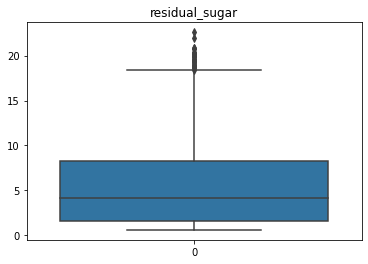

In [20]:
sns.boxplot(data=white.residual_sugar);
plt.title("residual_sugar")

Text(0.5, 1.0, 'chlorides')

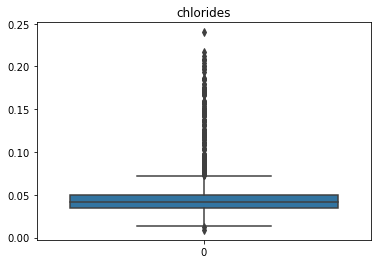

In [21]:
sns.boxplot(data=white.chlorides);
plt.title("chlorides")

Text(0.5, 1.0, 'sulphates')

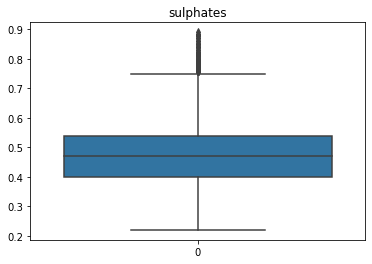

In [22]:
sns.boxplot(data=white.sulphates);
plt.title("sulphates")

# More Exploration

- I'll explore some variables compared against each other.

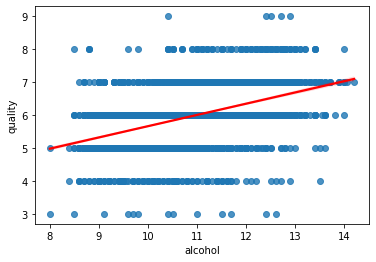

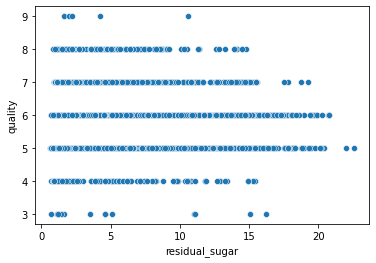

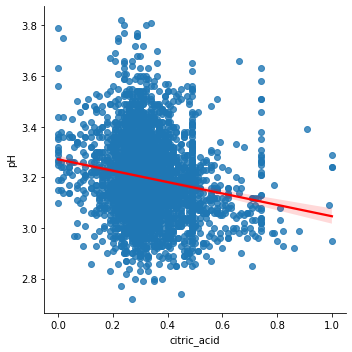

In [23]:
sns.regplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'} )
plt.show()
sns.scatterplot(data=white, x='residual_sugar', y='quality',)
plt.show()
sns.lmplot(data=white, x='citric_acid', y='pH', line_kws = {'color':'red'})
plt.show()

In [24]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Comparing variables against our target

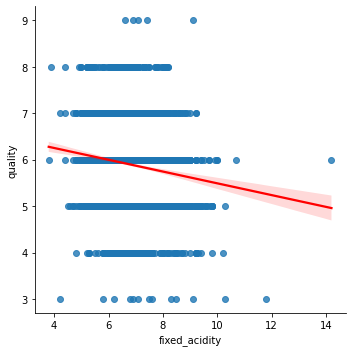

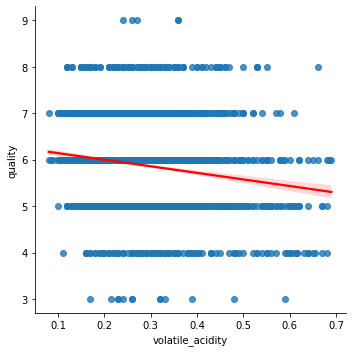

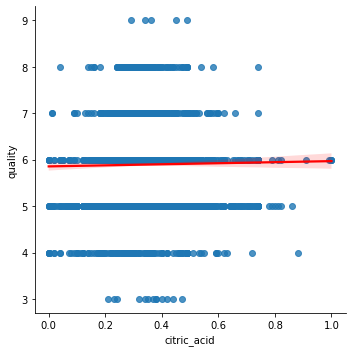

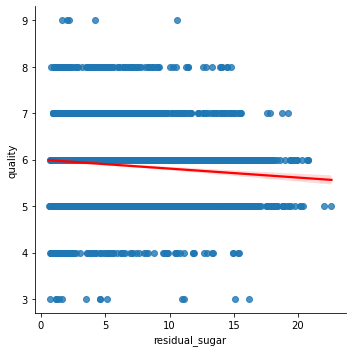

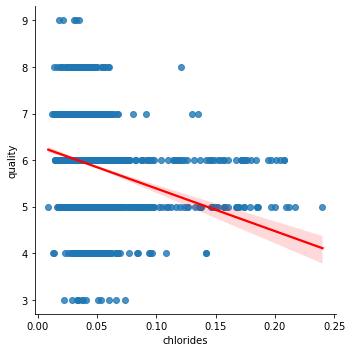

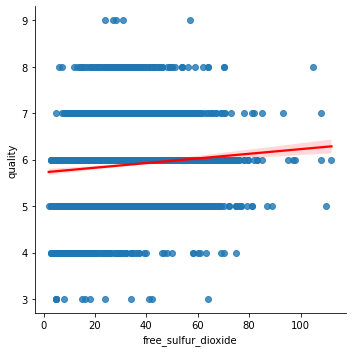

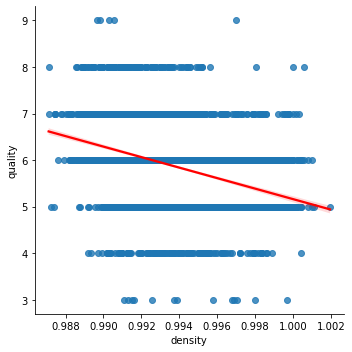

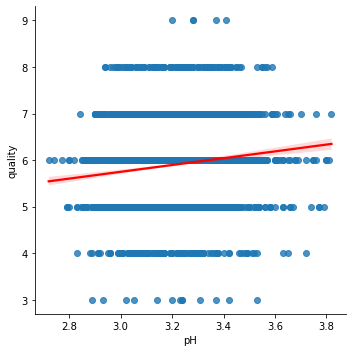

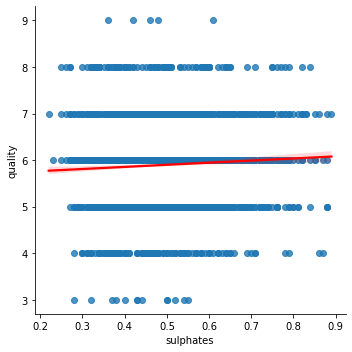

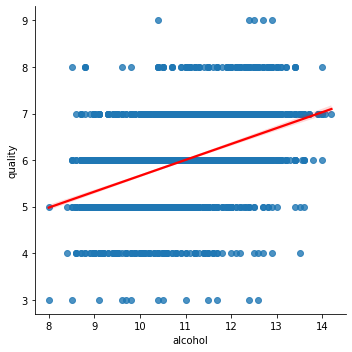

In [25]:
sns.lmplot(data=white, x='fixed_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='volatile_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='citric_acid', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='residual_sugar', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='chlorides', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='free_sulfur_dioxide', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='density', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='pH', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='sulphates', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'})
plt.show()

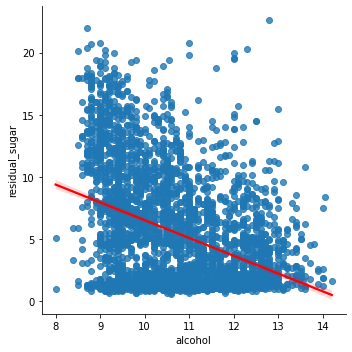

In [26]:
sns.lmplot(data=white, x='alcohol', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

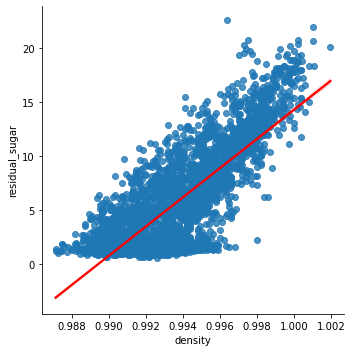

In [27]:
sns.lmplot(data=white, x='density', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

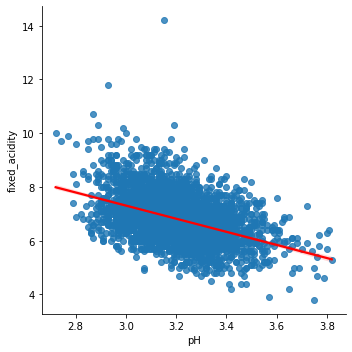

In [28]:
sns.lmplot(data=white, x='pH', y='fixed_acidity', line_kws = {'color':'red'})
plt.show()

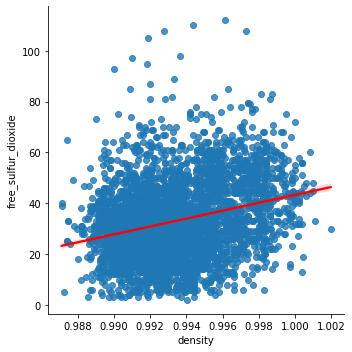

In [29]:
sns.lmplot(data=white, x='density', y='free_sulfur_dioxide', line_kws = {'color':'red'})
plt.show()

## Exploration Takeaways

- Density and RS are strongly correlated.
- Alcohol and RS are negatively correlated in a big way.
- Alcohol is a pretty good predictor of quality.
- Chlorides and density are negatively correlated with quality.
- Volatile acidity and fixed acidity are slightly negatively correlated with quality.
- pH and fixed_acidity are negatively correlated.

<AxesSubplot:>

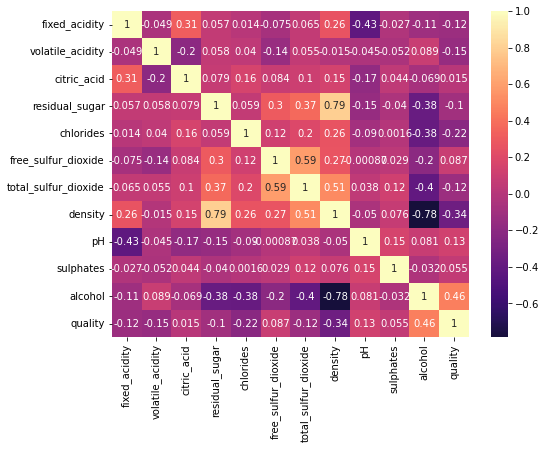

In [30]:

plt.figure(figsize=(8,6))
sns.heatmap(white.corr(), cmap='magma', center= 0, annot=True)

In [31]:
white.shape

(3600, 12)

## Comparing variables to density

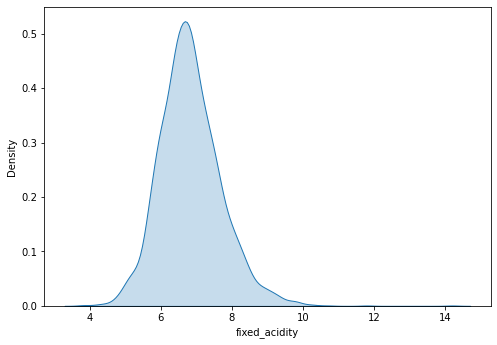

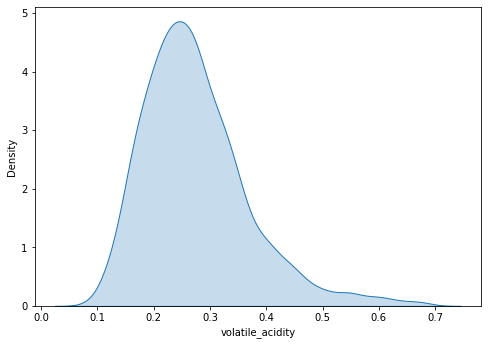

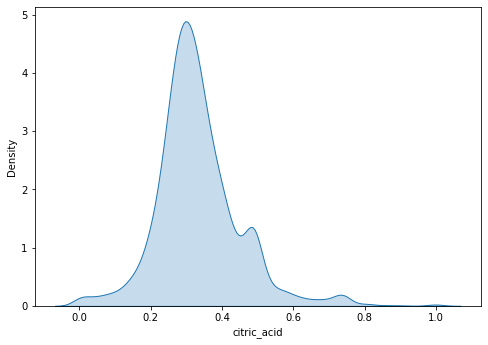

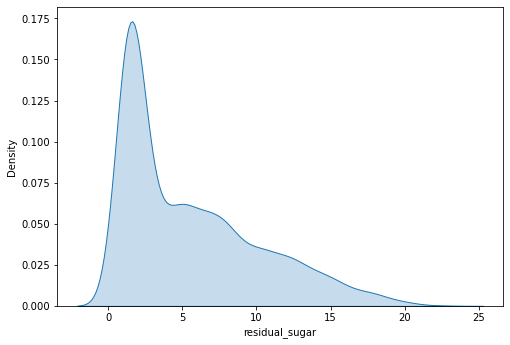

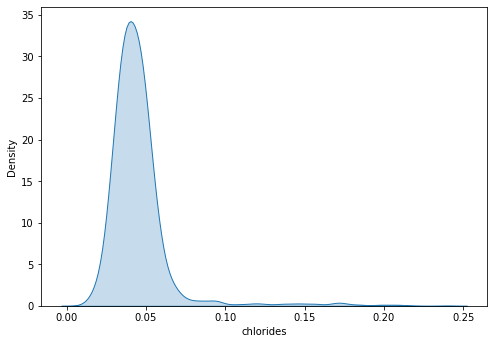

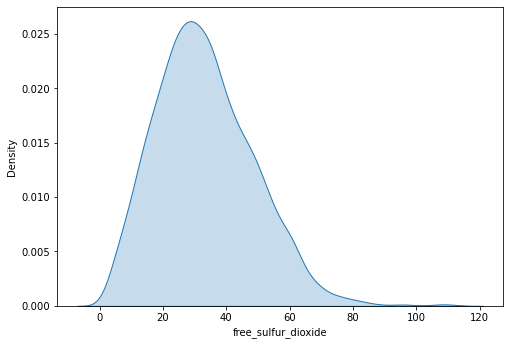

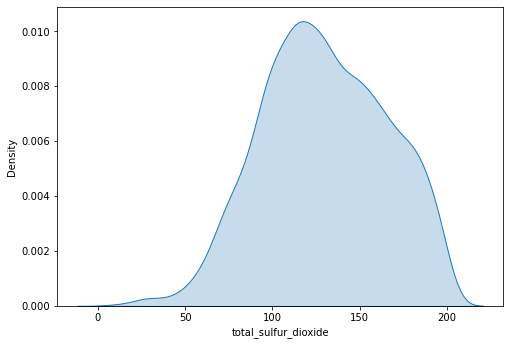

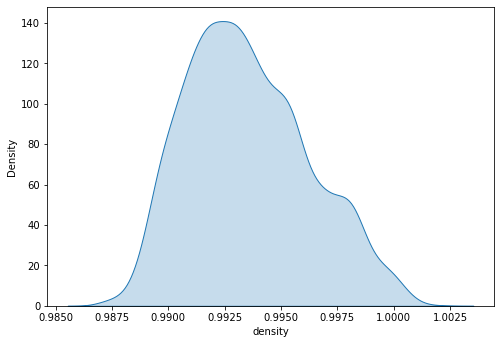

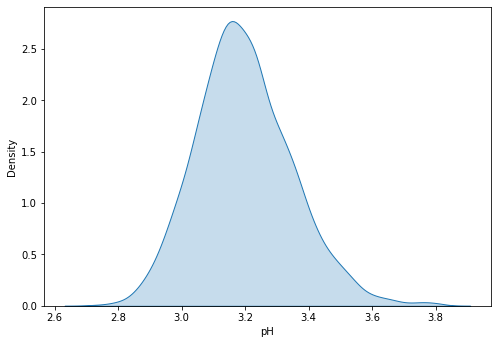

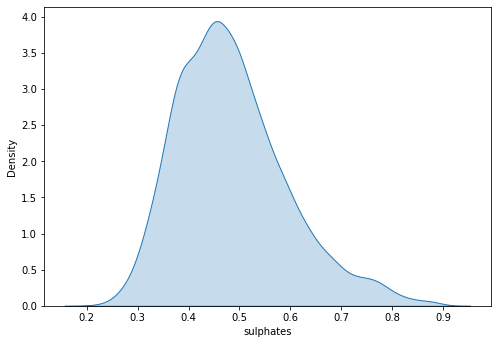

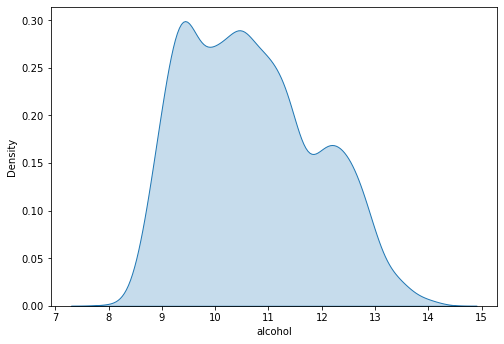

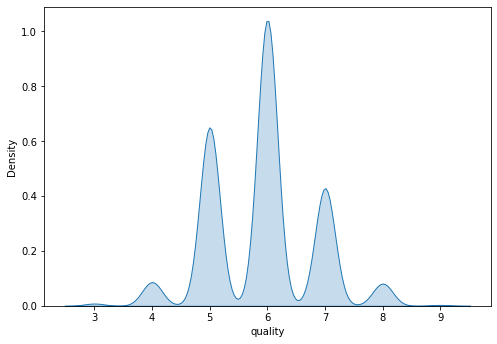

In [32]:
for col in white:
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=white, x=col, shade=True)

In [33]:

# splitting the data into train, validate, and test
train_validate, test = train_test_split(white, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(2016, 12) (864, 12) (720, 12)


In [34]:
# setting independent/dependent variables in ea. sub-dataset

x_train = train.drop(columns=["quality"])
y_train = train.quality

x_validate = validate.drop(columns=["quality"])
y_validate = validate.quality

x_test = test.drop(columns=["quality"])
y_test = test.quality

## Question 1. Does higher acid content mean better quality white wine?
Null Hypothesis:'quality' and 'volatile_acidity' independant"

Alternate Hypothesis: Quality and volatile_acidity are related.

Alpha =0.05

In [35]:
# Calculate Pearson Correlation Coefficient for comparison

x = x_train.volatile_acidity
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

# They have a slight negative correlation. 

(-0.16590595120326984, 6.552125642461974e-14)

In [36]:
### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


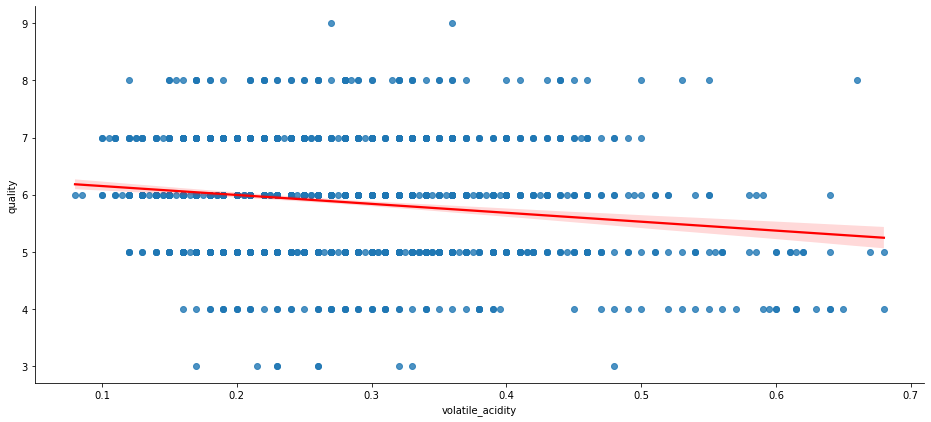

In [37]:
quality_and_volatile_acidity = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['volatile_acidity'],
                 y_vars = ['quality'])

quality_and_volatile_acidity.fig.set_size_inches(16,7)

## Question 2. How about Citric acid? Does that effect the quality?
Null Hypothesis: Citric acid and Quality are not related

Alternate Hypothesis: Quality and volatile_acidity are related.

Alpha =0.05

In [38]:
# Calculate Pearson Correlation Coefficient for comparison

x = x_train.citric_acid
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

(0.030384150020705394, 0.17265770099989286)

In [39]:
### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Accept Null Hypothesis


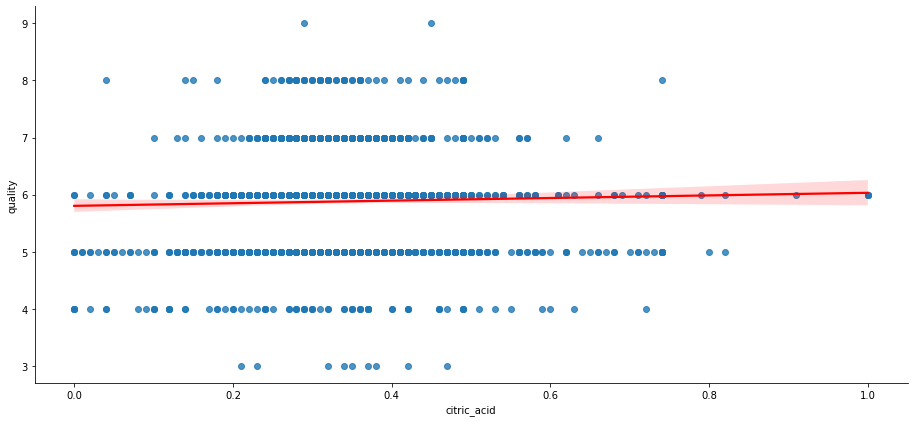

In [40]:
quality_and_citric_acid = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['citric_acid'],
                 y_vars = ['quality'])
quality_and_citric_acid.fig.set_size_inches(16,7)

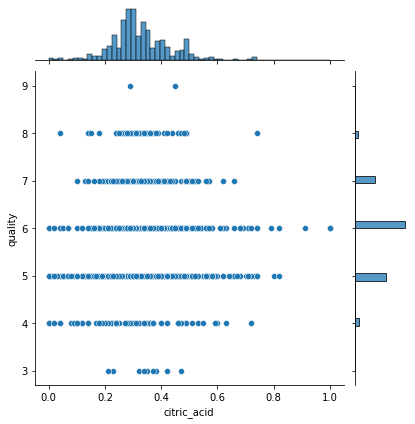

In [41]:
sns.jointplot(x="citric_acid", y="quality", data=train)
plt.xlabel("citric_acid")
plt.ylabel("quality")
plt.show()

In [42]:
print(train.quality.var())
print(train.chlorides.var())
alpha = .05

0.7942770491157634
0.0004491113070621121


In [43]:
t, p = stats.ttest_ind(train.quality, train.chlorides, equal_var=False)
t, p /2

(293.8159626305886, 0.0)

## Scaling with Min-Max

Text(0.5, 1.0, 'Scaled')

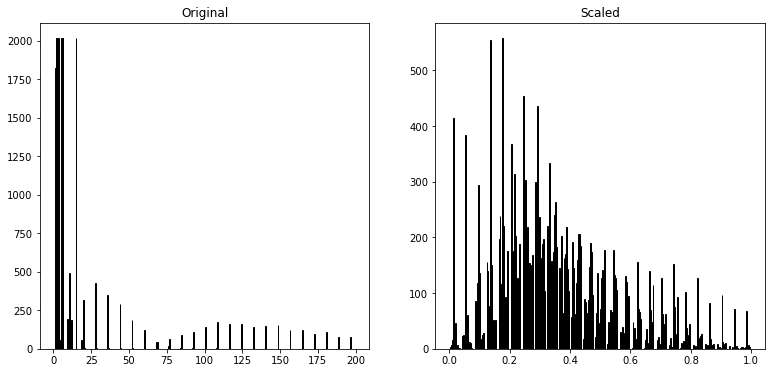

In [44]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


## Feature Engineering

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 5 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 5 X's correlated with y
f_selector.fit(x_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = x_train.iloc[:,feature_mask].columns.tolist()


In [46]:
f_feature

['fixed_acidity', 'volatile_acidity', 'chlorides', 'density', 'pH', 'alcohol']

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(x_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = x_train.iloc[:,feature_mask].columns.tolist()


In [48]:
rfe_feature

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']

In [49]:
feats = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']
scaler = helpers.prep.train_scaler(white[feats])

scaled_feats = scaler.transform(white[feats])

scaled_white = white.copy()

scaled_white[feats] = scaled_feats

In [50]:
import helpers.cluster

In [51]:
K = 5

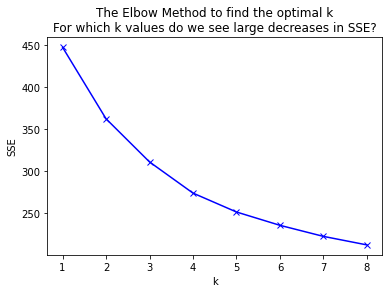

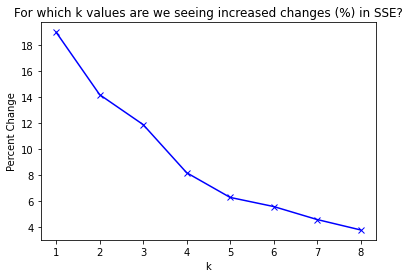

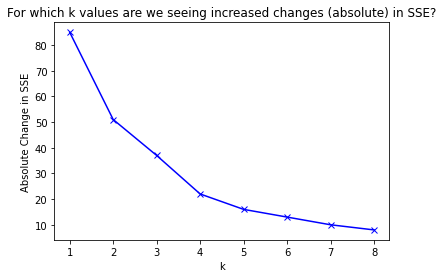

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [52]:
helpers.cluster.find_k(scaled_white, feats, range(1,10))

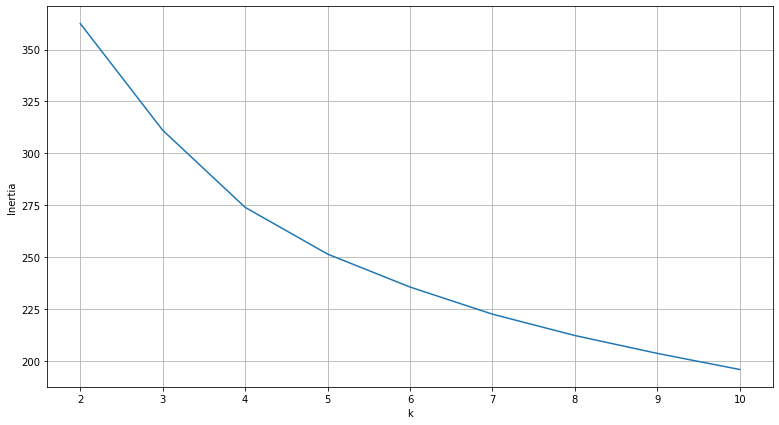

In [53]:
x_train_rfe = x_train[['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']]
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_white[feats])
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [54]:
class FlavorProfile:

    def __init__(self, **kwargs):
        defaultKwargs = {
            'features' : ['volatile_acidity','chlorides','residual_sugar','alcohol'],
            'random_state': 8,
            'k' : 4
        }
        kwargs = { **defaultKwargs, **kwargs }
        
        self.features = kwargs['features']
        self.random_state = kwargs['random_state']
        self.n_clusters = kwargs['k']
    
    def fit(self, train):
        self.train = train
        self.fit_scaler()
        self.fit_clusterer()
        return self

    def fit_scaler(self):
        self.scaler = helpers.prep.train_scaler(self.train[self.features])
        self.scaled_train = self.train.copy()
        self.scaled_train[self.features] = self.scaler.transform(self.train[self.features])

    def fit_clusterer(self):
        self.clusterer = helpers.cluster.build_kmeans_clusterer(df=self.scaled_train, cols=self.features, k=self.n_clusters, random_state=self.random_state)

    def predict(self, df):
        temp_df = df.copy()
        temp_df[self.features] = self.scaler.transform(temp_df[self.features])
        y = self.clusterer.predict(temp_df[self.features])
        return y

In [55]:
cluster1 = FlavorProfile()

In [56]:
cluster1.fit(train)

In [57]:
cluster1.predict(train)

array([1, 2, 1, ..., 1, 0, 0], dtype=int32)

In [58]:
cluster1.fit(x_train)

train['flavor_profile'] = cluster1.predict(x_train)
test['flavor_profile'] = cluster1.predict(test)
validate['flavor_profile'] = cluster1.predict(validate)

train['flavor_profile'] = cluster1.predict(train)
test['flavor_profile'] = cluster1.predict(test)
validate['flavor_profile'] = cluster1.predict(validate)

In [59]:
train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [60]:
x_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

[Text(0.5, 1.0, 'both')]

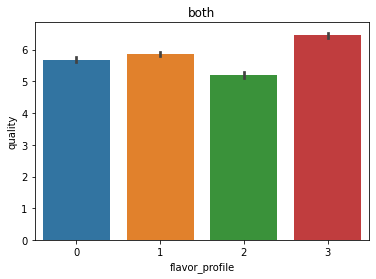

In [61]:
sns.barplot(data= train, x='flavor_profile', y='quality').set(title='both')

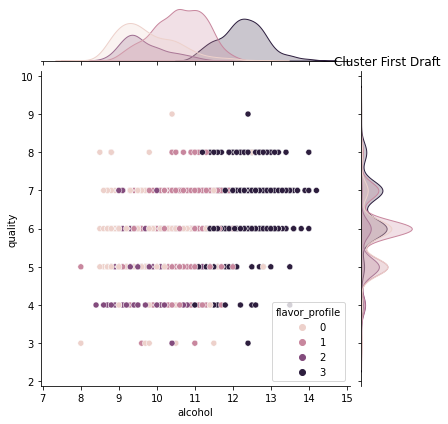

In [62]:
# Visualize clusters
sns.jointplot(data=train, y='quality', x='alcohol', hue='flavor_profile')
plt.title('Cluster First Draft')

plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=10)

# fit the data using RFE
rfe.fit(train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = train.iloc[:,feature_mask].columns.tolist()

In [64]:
rfe_feature

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'quality',
 'flavor_profile']

## Let's Build Some Models

- First, add cluster features to train validate samples.
- Set up prediction tables
- Apply models to samples and make predictions

In [65]:
from sklearn.linear_model import LinearRegression
from helpers.eval import BaselineModel

In [66]:
fs = (train, test, validate)
tx, sx, vx = (f['alcohol'] for f in fs)
ty, sy, vy = (f['quality'] for f in fs)

In [67]:
tx = tx.to_numpy().reshape(-1,1)
sx = sx.to_numpy().reshape(-1,1)
vx = vx.to_numpy().reshape(-1,1)

Model =  LinearRegression()
Model.fit(tx, ty)

LinearRegression()

In [68]:
pred_lin = Model.predict(tx)

In [69]:
pred_lin

array([6.0595276 , 5.38933437, 5.48986335, ..., 5.89197929, 5.72443098,
       5.32231504])

In [70]:
from helpers.eval import regression_metrics

In [71]:
regression_metrics(ty,pred_lin)

{'max_error': 3.4616435340069467,
 'sum_squared_error': 1280.1529613094294,
 'mean_squared_error': 0.6349965085860265,
 'root_mean_squared_error': 0.7968666818144843,
 'mean_absolute_error': 0.6253248141947231,
 'r2_score': 0.20013848563670322}

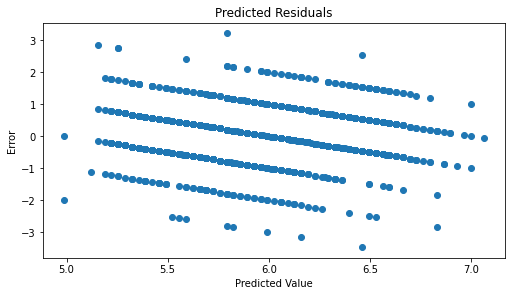

In [72]:
helpers.eval.plot_residuals(ty, pred_lin)

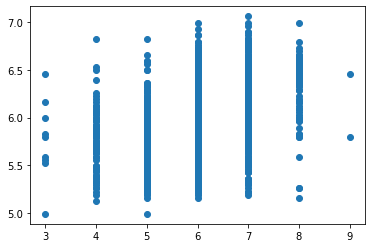

In [73]:
plt.scatter(train.quality, pred_lin)

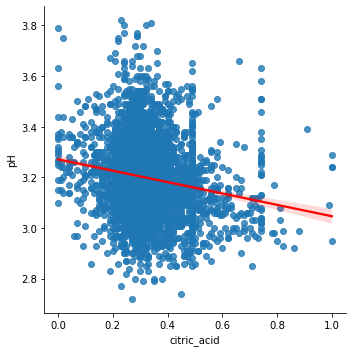

In [74]:
sns.lmplot(data=white, x='citric_acid', y='pH', line_kws = {'color':'red'})
plt.show()

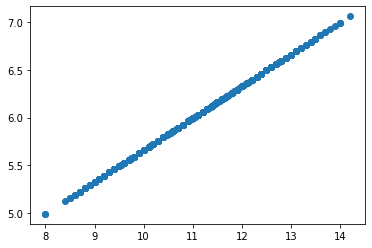

In [75]:
plt.scatter(train.alcohol, pred_lin)


In [76]:
y_train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [77]:
# 2. compute pred_mean
#quality_baseline_mean = y_train.mean()
#y_train['quality_baseline_mean'] = quality_baseline_mean
#y_validate['quality_baseline_mean'] = quality_baseline_mean
#y_test['quality_baseline_mean'] = quality_baseline_mean
#check to see which is better
#y_train.head()

### Linear Regression

In [78]:
predictions = pd.DataFrame()
validate_predictions = pd.DataFrame()
validate_predictions['actual'] = validate.quality
#validate_predictions['baseline'] = validate.pred_lin

# Linear regression
model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_scaled, y_train)
predictions['Linear_regression'] = model.predict(x_train_scaled )

# validate
validate_predictions['Linear_regression_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled , y_train)



0.3039880909539284

In [79]:
regression_metrics(ty,predictions['Linear_regression'])

{'max_error': 3.288902013017916,
 'sum_squared_error': 964.06316404728,
 'mean_squared_error': 0.5525520658790067,
 'root_mean_squared_error': 0.7433384598411458,
 'mean_absolute_error': 0.5789809494835726,
 'r2_score': 0.3039880909539284}

In [80]:
regression_metrics(vy,validate_predictions['Linear_regression_validate'])

{'max_error': 2.6326332949346147,
 'sum_squared_error': 438.8518593766941,
 'mean_squared_error': 0.5079303927970996,
 'root_mean_squared_error': 0.7126923549450349,
 'mean_absolute_error': 0.5588859335189915,
 'r2_score': 0.3475220152439019}

### KNN-Regressor

In [81]:
from helpers.eval import regression_metrics
from sklearn.neighbors import KNeighborsRegressor
# KNN (k=10)
model = KNeighborsRegressor(n_neighbors=10)

# train
model.fit(x_train_scaled, y_train)

predictions['KNN(k=10)_train'] = model.predict(x_train_scaled)

# validate
validate_predictions['KNN(k=10)_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)


0.4213193559424574

In [82]:
regression_metrics(ty,predictions['KNN(k=10)_train'])

{'max_error': 3.3,
 'sum_squared_error': 960.53,
 'mean_squared_error': 0.4594047619047619,
 'root_mean_squared_error': 0.6777940409185979,
 'mean_absolute_error': 0.5223214285714286,
 'r2_score': 0.4213193559424574}

In [83]:
regression_metrics(vy,validate_predictions['KNN(k=10)_validate'])

{'max_error': 2.8,
 'sum_squared_error': 453.59999999999997,
 'mean_squared_error': 0.5249999999999999,
 'root_mean_squared_error': 0.7245688373094719,
 'mean_absolute_error': 0.5650462962962963,
 'r2_score': 0.3255947136563877}

### Lasso + LARS

In [84]:
lars = LassoLars(alpha=1.0)

lars.fit(x_train_scaled, y_train)

temp_preds_lars = lars.predict(x_train_scaled)

print(helpers.eval.regression_metrics(y_train, temp_preds_lars))

temp_preds_lars = lars.predict(x_validate_scaled)

print(helpers.eval.regression_metrics(y_validate, temp_preds_lars))

{'max_error': 3.121031746031746, 'sum_squared_error': 1600.4682539682544, 'mean_squared_error': 0.7938830624842532, 'root_mean_squared_error': 0.8910011573978192, 'mean_absolute_error': 0.6717450869236584, 'r2_score': 0.0}
{'max_error': 3.121031746031746, 'sum_squared_error': 673.2913832199547, 'mean_squared_error': 0.7792724342823549, 'root_mean_squared_error': 0.8827640875581397, 'mean_absolute_error': 0.6724950396825398, 'r2_score': -0.001038950822619844}


### Tweedie Regressor

In [85]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

glm.fit(x_train_scaled, y_train)

temp_preds_glm = glm.predict(x_train_scaled)

print(helpers.eval.regression_metrics(y_train, temp_preds_glm))

temp_preds_glm = glm.predict(x_validate_scaled)

print(helpers.eval.regression_metrics(y_validate, temp_preds_glm))

{'max_error': 3.289879644404401, 'sum_squared_error': 1113.9478827676523, 'mean_squared_error': 0.5525535132776054, 'root_mean_squared_error': 0.7433394334202952, 'mean_absolute_error': 0.5789810339284553, 'r2_score': 0.3039862677652664}
{'max_error': 2.633439294488144, 'sum_squared_error': 438.8681579157261, 'mean_squared_error': 0.5079492568469052, 'root_mean_squared_error': 0.7127055891789437, 'mean_absolute_error': 0.5588828284648106, 'r2_score': 0.34749778283454824}


## Polynomial Regressor

In [86]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_scaled_degree3 = pf.fit_transform(x_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_scaled_degree3 = pf.transform(x_validate_scaled)
X_test_scaled_degree3 = pf.transform(x_test_scaled)

In [87]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(x_train_scaled, y_train)

# predict train
temp_preds_poly = lm2.predict(x_train_scaled)

print(helpers.eval.regression_metrics(y_train, temp_preds_poly))

temp_preds_poly= lm2.predict(x_validate_scaled)

print(helpers.eval.regression_metrics(y_validate, temp_preds_poly))

{'max_error': 3.2889020130179176, 'sum_squared_error': 1113.9449648120778, 'mean_squared_error': 0.5525520658790068, 'root_mean_squared_error': 0.7433384598411459, 'mean_absolute_error': 0.5789809494835727, 'r2_score': 0.3039880909539283}
{'max_error': 2.6326332949346156, 'sum_squared_error': 438.85185937669416, 'mean_squared_error': 0.5079303927970997, 'root_mean_squared_error': 0.712692354945035, 'mean_absolute_error': 0.5588859335189916, 'r2_score': 0.3475220152439019}


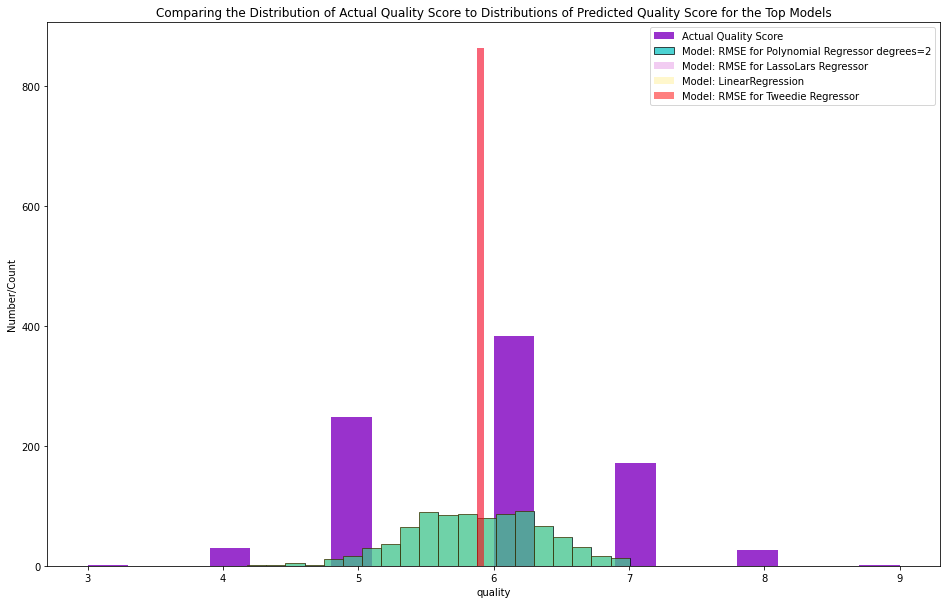

In [90]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,10))
plt.hist(y_validate, color='darkorchid', alpha=1, bins=20, label="Actual Quality Score")
plt.hist(temp_preds_poly, color='c', alpha=.7, bins=20, label="Model: RMSE for Polynomial Regressor degrees=2", ec='black')
# plt.hist(y_validate.logerror_pred_lm3, color='chartreuse', alpha=.2, bins=50, label="Model: RMSE for Polynomial Regressor degrees=3")
plt.hist(temp_preds_lars, color='m', alpha=.2, bins=20,label="Model: RMSE for LassoLars Regressor ")
plt.hist(validate_predictions['Linear_regression_validate'], color='gold', alpha=.2, bins=20,label="Model: LinearRegression")
plt.hist(temp_preds_lars, color='red', alpha=.5, bins=20, label="Model: RMSE for Tweedie Regressor")

# plt.xlim(-1, 1)
plt.xlabel("quality")
plt.ylabel("Number/Count")
plt.title("Comparing the Distribution of Actual Quality Score to Distributions of Predicted Quality Score for the Top Models")
plt.legend()
plt.show()

In [ ]:
y_train.tail()

## Polynomial Regressor

In [ ]:
pd.Series(temp_preds_poly).plot.hist()

## Testing time

In [ ]:

y_test = pd.DataFrame(y_test)

# predict on test
test_preds_KNN = model.predict(x_test_scaled)


print(helpers.eval.regression_metrics(sy, test_preds_KNN))

# Takeaways